# NovaSol Solar Farm Contruction - PERT Analysis

**- Company: Novasol Energy**

**- Project: Construction of a 50MW Solar Farm in a rural area.**

![](solar_farm.jpg)


### Project Management Questions: 
1. Construct the project network.
2. d the expected duration and variance of each activity (using PERT: *Expected = (a + 4m + b)/6*, *Variance = [(b – a)/6]²*).
3. d the critical path and expected project completion time.
4. Probability of completing the project on or before 19 weeks?
5. If the probability is 0.85, find the expected project completion time.

![](pert_image.jpg)

## To construct and Visualize the Project Network

Text(0.5, 1.0, 'Solar Farm Project Network (Novasol Energy)')

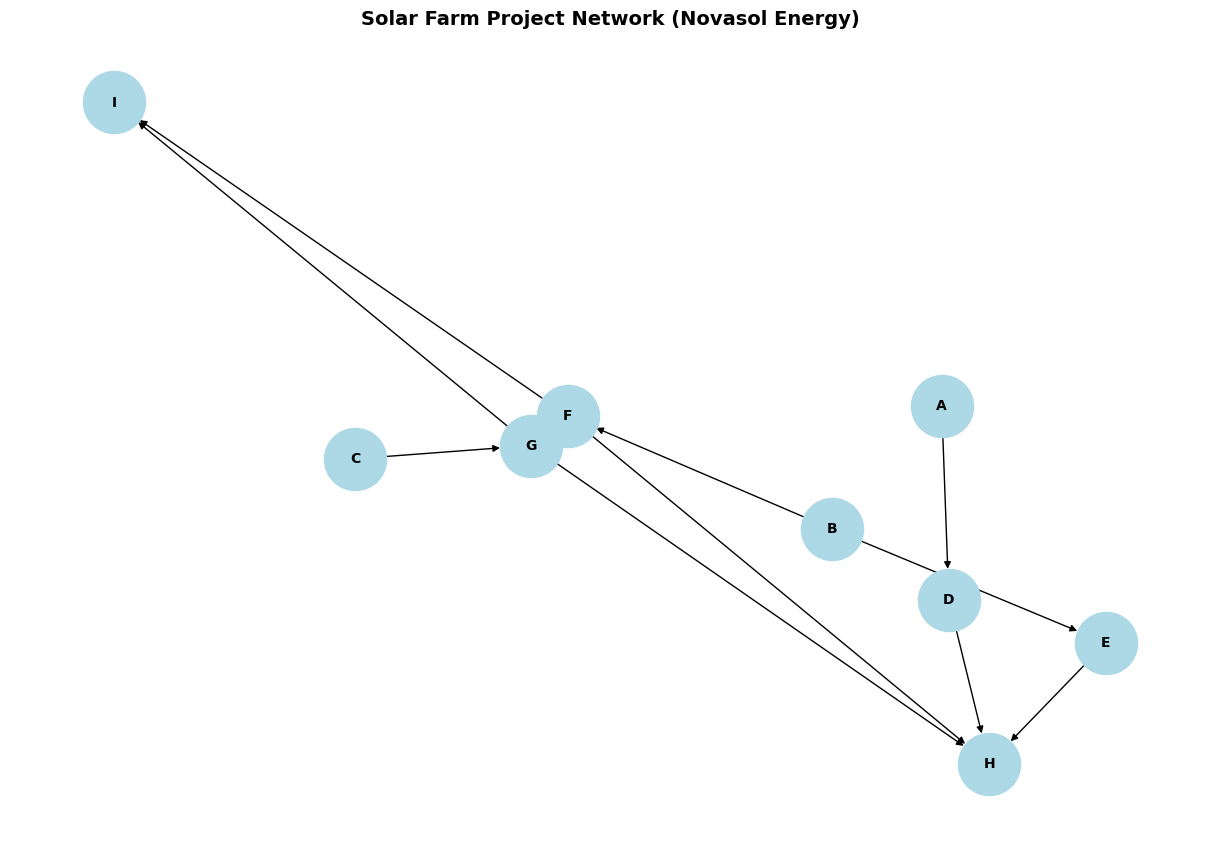

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define activities, predecessors, and durations (a, m, b)
activities = {
    'A': {'predecessors': [], 'duration': (2, 2, 8)},
    'B': {'predecessors': [], 'duration': (1, 2, 3)},
    'C': {'predecessors': [], 'duration': (1, 5, 9)},
    'D': {'predecessors': ['A'], 'duration': (1, 2, 9)},
    'E': {'predecessors': ['B'], 'duration': (1, 2, 3)},
    'F': {'predecessors': ['B'], 'duration': (1, 2, 3)},
    'G': {'predecessors': ['C'], 'duration': (1, 4, 7)},
    'H': {'predecessors': ['D', 'E', 'F', 'G'], 'duration': (6, 7, 8)},
    'I': {'predecessors': ['F', 'G'], 'duration': (1, 2, 9)},
}

G = nx.DiGraph()

# Add nodes and edges to the graph

for activity, details in activities.items():
    G.add_node(activity, duration=details['duration'])
    for predecessor in details['predecessors']:
        G.add_edge(predecessor, activity)
        
# Draw the graph
pos = nx.spring_layout(G, seed=42) # positions for all nodes
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrows=True)
# edge_labels = {(u, v): f"{G.nodes[v]['duration']}" for u, v in G.edges()}
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)
plt.title("Solar Farm Project Network (Novasol Energy)", fontdict={'fontsize': 14, 'fontweight': 'bold'})


## (b) Expected Duration and Variance (PERT)

In [ ]:
# Define a function to calculate expected duration and variance

def pert_mean_variance(a, m, b):
    """
    Calculate the mean and variance using PERT formula.
    
    Parameters:
    a (float): Optimistic duration
    m (float): Most likely duration
    b (float): Pessimistic duration
    
    Returns:
    tuple: mean and variance
    """
    expected_duration = (a + 4 * m + b) / 6
    variance = ((b - a) / 6) ** 2
    return expected_duration, variance

In [ ]:
import pandas as pd

# Convert activities dictionary to DataFrame

df = pd.DataFrame.from_dict(activities, orient= 'index')
# This line splits the 'duration' tuple column into three separate columns: 'a', 'm', and 'b'
# For each row, it takes the tuple in 'duration' (e.g., (2, 2, 8)), and assigns the first value to 'a', second to 'm', and third to 'b'
df[["a", "m", "b"]] = pd.DataFrame(df["duration"].tolist(), index=df.index)
df.drop(columns = ["duration"], inplace=True)
df



,predecessors,a,m,b
A,[],2,2,8
B,[],1,2,3
C,[],1,5,9
D,[A],1,2,9
E,[B],1,2,3
F,[B],1,2,3
G,[C],1,4,7
H,"[D, E, F, G]",6,7,8
I,"[F, G]",1,2,9


In [ ]:
# Apply the PERT function row-wise to calculate expected duration and variance
df[['mean', 'variance']] = df.apply(lambda row: pert_mean_variance(row['a'], row['m'], row['b']), axis=1, result_type='expand')
# Explanation of each argument:
# - df.apply(...): Applies a function along an axis of the DataFrame.
# - lambda row: pert_mean_variance(row['a'], row['m'], row['b']): For each row, calls the pert_mean_variance function with the 'a', 'm', and 'b' values from that row.
# - axis=1: Applies the function to each row (not column).
# - result_type='expand': Expands the tuple returned by pert_mean_variance into separate columns.
# The result assigns the calculated mean and variance to new columns 'mean' and 'variance' in the DataFrame.

# using print options in numpy to display variance in 2 decimal places
import numpy as np
np.set_printoptions(precision=2)
# Display the DataFrame with expected duration and variance
df  

,predecessors,a,m,b,mean,variance
A,[],2,2,8,3.0,1.000000
B,[],1,2,3,2.0,0.111111
C,[],1,5,9,5.0,1.777778
D,[A],1,2,9,3.0,1.777778
E,[B],1,2,3,2.0,0.111111
F,[B],1,2,3,2.0,0.111111
G,[C],1,4,7,4.0,1.000000
H,"[D, E, F, G]",6,7,8,7.0,0.111111
I,"[F, G]",1,2,9,3.0,1.777778


## (c) Critical Path and Project Duration

### The goal is to identify the longest path (critical path) and total project duration


In [ ]:
# Forward pass (earliest start times/ finish times)
earliest_start = {activity : 0 for activity in activities}
earliest_finish = {}

for activity in nx.topological_sort(G):
    max_predecessor_finish = 0
    for pred in G.predecessors(activity):
        max_predecessor_finish = max(max_predecessor_finish, earliest_finish[pred])
    a, m, b = activities[activity]['duration']
    mean, _ = pert_mean_variance(a, m, b)
    earliest_start[activity] = max_predecessor_finish
    earliest_finish[activity] = earliest_start[activity] + mean 

project_duration = max(earliest_finish.values())

# print(project_duration)

# 1. Create a dictionary to store the earliest start time for each activity, initializing all to 0.
# 2. Create an empty dictionary to store the earliest finish time for each activity.
# 3. Iterate through the activities in topological order (so all predecessors are processed before an activity).
# 4. For each activity, initialize the maximum finish time among its predecessors to 0.
# 5. For each predecessor of the current activity, update the maximum predecessor finish time.
# 6. Retrieve the (a, m, b) duration tuple for the current activity.
# 7. Calculate the PERT mean (expected duration) for the activity.
# 8. Set the earliest start time for the activity as the maximum finish time among its predecessors.
# 9. Set the earliest finish time as the earliest start plus the mean duration.
# 10. After all activities are processed, find the maximum earliest finish time, which is the total project duration.
# 11. Print the project duration.

16.0


In [ ]:
# Backward pass (latest start times/ finish times)


latest_finish = {activity: project_duration for activity in activities}
latest_start = {}

for activity in reversed(list(nx.topological_sort(G))):
    min_successor_start = project_duration
    for succ in G.successors(activity):
        min_successor_start = min(min_successor_start, latest_start.get(succ, project_duration))
    a, m, b = activities[activity]['duration']
    mean, _ = pert_mean_variance(a, m, b)
    latest_finish[activity] = min_successor_start
    latest_start[activity] = latest_finish[activity] - mean
    
    # The code above performs the backward pass to calculate the latest start and finish times for each activity.

    # latest_finish = {activity: project_duration for activity in activities}
    #   - Initializes the latest finish time for every activity to the total project duration (the latest possible finish).

    # latest_start = {}
    #   - Initializes an empty dictionary to store the latest start times for each activity.

    # for activity in reversed(list(nx.topological_sort(G))):
    #   - Iterates through the activities in reverse topological order (from end to start of the project network).

    #     min_successor_start = project_duration
    #     - Sets the minimum successor start time to the project duration (acts as an initial upper bound).

    #     for succ in G.successors(activity):
    #         min_successor_start = min(min_successor_start, latest_start.get(succ, project_duration))
    #         - For each successor of the current activity, updates min_successor_start to the smallest latest start time among successors.

    #     a, m, b = activities[activity]['duration']
    #     mean, _ = pert_mean_variance(a, m, b)
    #     - Retrieves the (a, m, b) duration tuple for the activity and calculates the expected duration (mean) using the PERT formula.

    #     latest_finish[activity] = min_successor_start
    #     - Sets the latest finish time for the activity as the minimum latest start time among its successors.

    #     latest_start[activity] = latest_finish[activity] - mean
    #     - Calculates the latest start time by subtracting the mean duration from the latest finish time.
    


In [ ]:
# Identify critical path (zero slack activities)
critical_path = []
for activity in activities:
    slack = latest_start[activity] - earliest_start[activity]
    if slack == 0:
        critical_path.append(activity)
        
# Print the critical path and project duration
print("Critical Path:", " -> ".join(critical_path))
print("Total Project Duration:", project_duration, 'weeks')
# For each activity, calculate the slack (difference between latest and earliest start times)
# If slack is zero, the activity is on the critical path and is added to the critical_path list

# Print the critical path as a sequence of activities
print("Critical Path:", " -> ".join(critical_path))

# Print the total project duration in weeks
print("Total Project Duration:", project_duration, 'weeks')


Critical Path: C -> G -> H
Total Project Duration: 16.0 weeks


## (d) Probability of completion in <= 19 weeks

In [ ]:
# 1. Import the normal distribution from scipy.stats
#    This is used to calculate the cumulative distribution function (CDF) for the probability calculation.
from scipy.stats import norm

# 2. Calculate the total variance along the critical path.
#    For PERT, the variance of the project duration is the sum of the variances of the activities on the critical path.
#    Formula for variance of an activity: variance = ((b - a) / 6) ** 2
critical_var = sum(
    pert_mean_variance(*activities[activity]['duration'])[1] for activity in critical_path
)

print("Critical Path Variance:", critical_var)

# 3. Calculate the z-score for the desired completion time (19 weeks).
#    Formula: z = (T - μ) / σ
#    Where:
#      - T is the target completion time (19 weeks)
#      - μ is the expected project duration (project_duration)
#      - σ is the standard deviation (sqrt of critical_var)
z_score = (19 - project_duration) / (critical_var ** 0.5)

# 4. Calculate the probability of completing the project in <= 19 weeks.
#    This uses the cumulative distribution function (CDF) of the normal distribution.
probability = norm.cdf(z_score)

print(f"Probability of completion in <= 19 weeks: {probability:.4f}")

Critical Path Variance: 2.888888888888889
Probability of completion in <= 19 weeks: 0.9612


## (e) Completion Time for 85% Probability


In [ ]:
z_85 = norm.ppf(0.85)  # z-score for 85% probability
# Calculate the completion time for 85% probability.
completion_time_85 = project_duration + z_85 * (critical_var ** 0.5)
print(f"Completion time for 85% probability: {completion_time_85:.2f} weeks, which is approximately {completion_time_85:.0f} weeks")

Completion time for 85% probability: 17.76 weeks, which is approximately 18 weeks
